$$\textbf{Blatt 09 - Praktische Optimierung - Adrian Lentz, Robert Schönewald}$$

Lösungen und Erklärungen für Blatt 09. $$\newline$$
Adrian Lentz - Matrikelnummer: 258882 $$\newline$$
Robert Schönewald - Matrikelnummer: 188252

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skopt import Optimizer
from skopt.plots import plot_gaussian_process

In [27]:
def fun1(x):
    return np.sin(5*x[0])*(1-np.tanh(x[0]**2))

def fun2(x):
    return x[0]**2-10*np.cos(5*x[0])

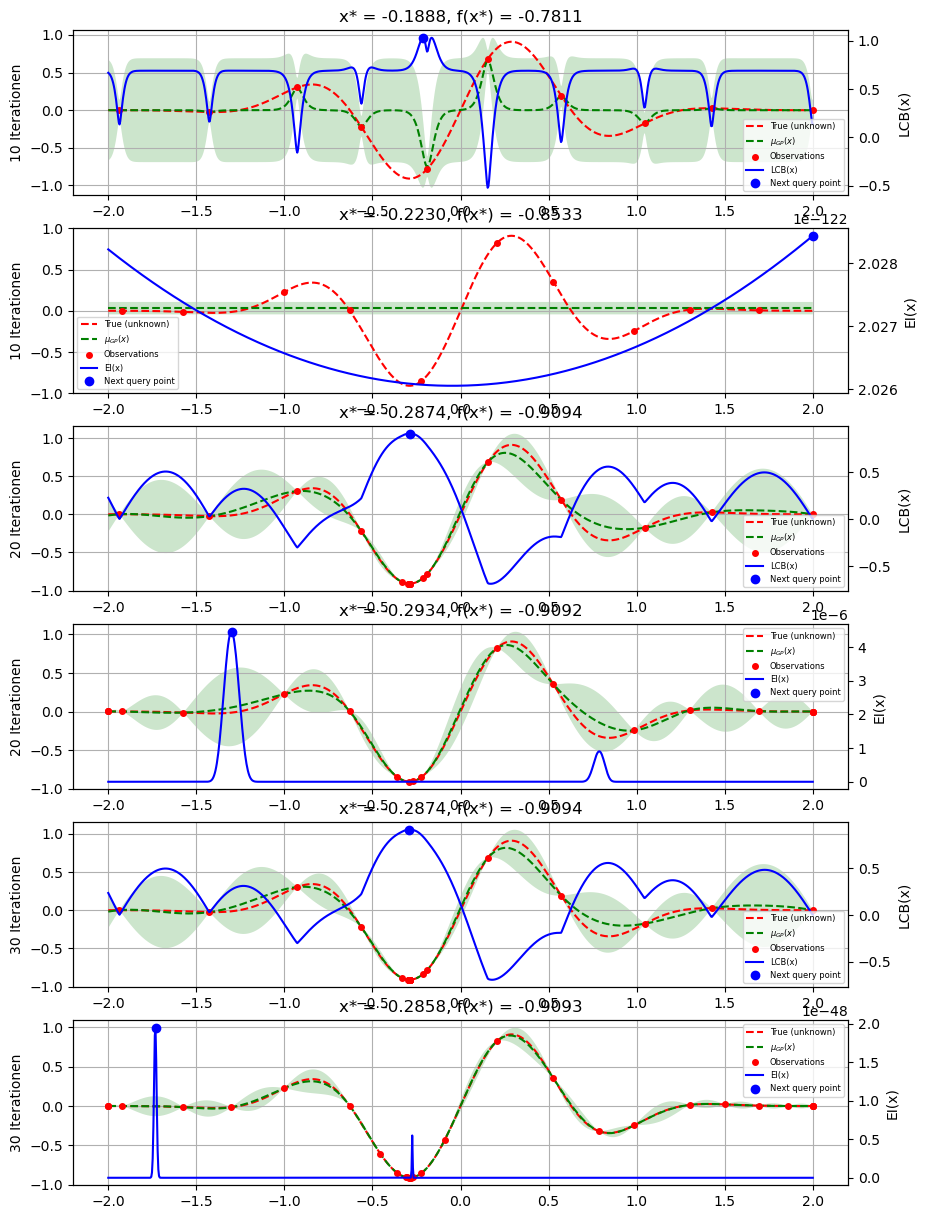

In [43]:
optfun1_LCB=Optimizer([(-2.0, 2.0)],base_estimator="GP",initial_point_generator="lhs",acq_func="LCB")
optfun1_EI=Optimizer([(-2.0, 2.0)],base_estimator="GP",initial_point_generator="lhs",acq_func="EI")
for n_iter in range(3):
    for i in range(10):
        x=optfun1_LCB.ask()
        y=fun1(x)
        optfun1_LCB.tell(x,y)
        x=optfun1_EI.ask()
        y=fun1(x)
        optfun1_EI.tell(x,y)
    # Plot true function.
    plt.subplot(6, 1, 2*n_iter+1)

    if n_iter == 0:
        show_legend = True
    else:
        show_legend = False

    ax = plot_gaussian_process(optfun1_LCB.get_result(),objective=fun1,show_next_point=True,show_acq_func=True)
    ax.set_ylabel(str(n_iter*10 + 10)+" Iterationen")
    ax.set_xlabel("")
    # Plot EI(x)
    plt.subplot(6, 1, 2*n_iter+2)
    ax = plot_gaussian_process(optfun1_EI.get_result(),objective=fun1,show_next_point=True,show_acq_func=True)
    ax.set_ylabel(str(n_iter*10 + 10)+" Iterationen")
    ax.set_xlabel("")
fig = plt.gcf()
fig.set_size_inches(10, 15)
plt.show()

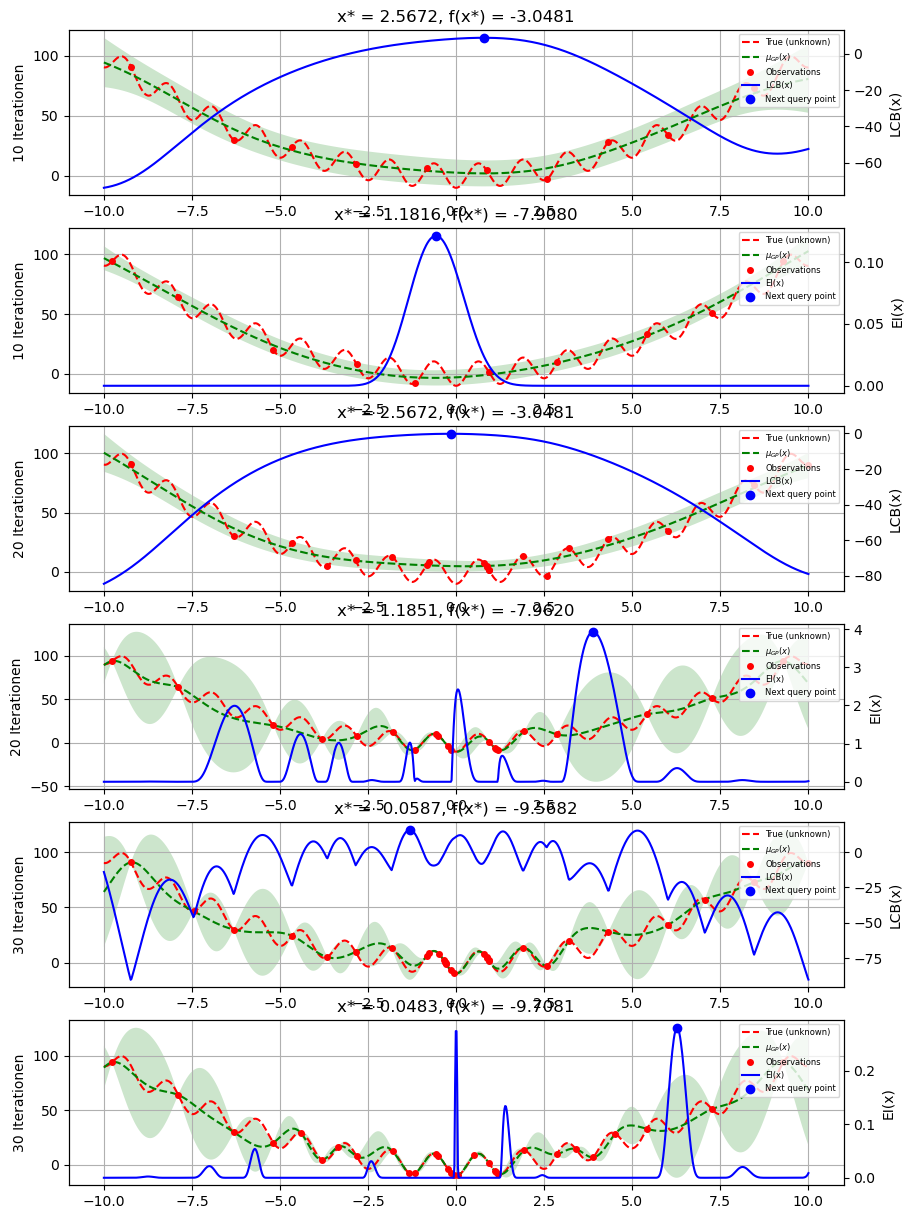

In [44]:
optfun2_LCB=Optimizer([(-10.0, 10.0)],base_estimator="GP",initial_point_generator="lhs",acq_func="LCB")
optfun2_EI=Optimizer([(-10.0, 10.0)],base_estimator="GP",initial_point_generator="lhs",acq_func="EI")
for n_iter in range(3):
    for i in range(10):
        x=optfun2_LCB.ask()
        y=fun2(x)
        optfun2_LCB.tell(x,y)
        x=optfun2_EI.ask()
        y=fun2(x)
        optfun2_EI.tell(x,y)
    # Plot true function.
    plt.subplot(6, 1, 2*n_iter+1)

    if n_iter == 0:
        show_legend = True
    else:
        show_legend = False

    ax = plot_gaussian_process(optfun2_LCB.get_result(),objective=fun2,show_next_point=True,show_acq_func=True)
    ax.set_ylabel(str(n_iter*10 + 10)+" Iterationen")
    ax.set_xlabel("")
    # Plot EI(x)
    plt.subplot(6, 1, 2*n_iter+2)
    ax = plot_gaussian_process(optfun2_EI.get_result(),objective=fun2,show_next_point=True,show_acq_func=True)
    ax.set_ylabel(str(n_iter*10 + 10)+" Iterationen")
    ax.set_xlabel("")
fig = plt.gcf()
fig.set_size_inches(10, 15)
plt.show()

In der Grafik sieht man zunächst eine rote gestrichelte Linie, welche die wahre gegebene Funktion darstellt. Auf ihr befinden sich rote Punkte, das sind die zufällig gewählten Abtastungen auf der Funktion.\
Die grüne gestrichelte Linie stellt die Approximation der echten Funktion durch das Gaussian Process Model dar. Die grünen Flächen um die Linie herum geben an, wie sicher sich der Approximator ist. Wenn die Fläche groß ist, kann die echte Funktion in diesem Bereich sein, weshalb der Approximator sich unsicher ist.\
Der blaue Graph ist die Acquisition Function.

Wir erkennen im direkten Vergleich, dass bei Funktion 1 EI deutlich näher an die echte Funktion rankommt als LCB. Auch bei der zweiten Funktion scheint EI besser zu performen. Diese Ergebnisse können jedoch schwanken, da hier nur einmal getestet wurde.